In [1]:
# import scripts.control_utils as cu
from importlib import reload
import matplotlib.pyplot as plt
from annotator.midas import MidasDetector
from annotator.canny import CannyDetector
from ldm.data.util import resize_image_pil
import torch
import torchvision.transforms as tt
import numpy as np

from PIL import Image
# reload(cu)
from safetensors.torch import save_file
import glob 

torch.cuda.set_device('cuda:3')
import tqdm

In [2]:
import scripts.control_utils as cu
import os

def load_model_from_dic (path_dic, Lora_kitti, Lora_cubes):

    model = cu.create_model(path_dic['yaml'])

    if path_dic['ckpt'] != None: 
        ckpt = torch.load(path_dic['ckpt'], map_location='cpu')
        model.load_state_dict(ckpt['state_dict'], strict=False)
    

    if Lora_kitti: 
        LORA_ckpt = torch.load('/export/data/vislearn/rother_subgroup/feiden/models/pretrained/stable_diffusion_XL/sdxl_kitti.safetensors',
                                map_location='cpu')
        model.load_state_dict(LORA_ckpt['state_dict'], strict=False)
    if Lora_cubes: 
        LORA_ckpt = torch.load('/export/data/vislearn/rother_subgroup/sdxl_render.safetensors', map_location='cpu')
        model.load_state_dict(LORA_ckpt['state_dict'], strict=False)
    
    return model.to('cuda')

def get_paths (root, yaml_path, ckpt_path):
    path_dic = {}
    if type(yaml_path) is str:
        path_dic['yaml'] = os.path.join(root, yaml_path)
    else: 
        path_dic['ymal'] = None

    if type(ckpt_path) is str:
        path_dic['ckpt'] = os.path.join(root, ckpt_path)
    else: 
        path_dic['ckpt'] = None
    return path_dic

model_paths = {}

model_paths['CNXS_10'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sdxl/midas/2023-08-16T12-53-33_cross_encD_cat_learnEmb_10p_depth/',
                                   yaml_path='configs/project.yaml',
                                   ckpt_path= None)

model_paths['CNXS_10_Canny'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sdxl/canny/2023-08-18T11-16-30_cross_encD_cat_small_10p_learnEmb_bs40_canny/',
                                   yaml_path='configs/project.yaml',
                                   ckpt_path= None)

model_paths['CNXS_20_Canny'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sdxl/canny/2023-08-18T11-16-30_cross_encD_cat_small20p_learnEmb_bs40_canny/',
                                   yaml_path='configs/2023-08-18T11-16-30-project.yaml',
                                   ckpt_path= 'checkpoints/epoch=000001-step=000037000.ckpt')

model_paths['CNXS_48m'] = get_paths(root='/export/home/ffeiden/Projects/ControlNet-XS/configs/inference/sdxl/',
                                   yaml_path='sdxl_encD_depth_48m.yaml',
                                   ckpt_path= None)

model_paths['CNXS_50'] = get_paths(root='/export/home/ffeiden/Projects/ControlNet-XS/',
                                   yaml_path='configs/inference/sdxl/sdxl_50p_project.yaml',
                                   ckpt_path= None)

model_paths['CNXS_20'] = get_paths(root='/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sdxl/midas/2023-08-22T14-31-49_cross_encD_cat_20p_lr4_learnEmb_depth/',
                                   yaml_path='configs/2023-08-22T14-31-49-project.yaml',
                                   ckpt_path= 'checkpoints/epoch=000000-step=000012000.ckpt')


temp_dic = {}
temp_dic['yaml'] = '/export/home/ffeiden/Projects/ControlNet-XS/'+'configs/inference/sdxl/sdxl_20p_release_model.yaml'
# temp_dic['ckpt'] = None

temp_dic['ckpt'] = '/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sdxl/midas/2023-11-04T20-16-10_cross_encD_cat_20mRandom_depth_bs40/'+ \
                    'checkpoints/trainstep_checkpoints/epoch=000000-step=000024000.ckpt'

model_paths['CNXS_20M'] = temp_dic

/export/home/ffeiden/miniconda3/envs/.pt13/lib/python3.8/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


In [3]:
model = load_model_from_dic(model_paths['CNXS_10_Canny'], False, False)


No SDP backend available, likely because you are running in pytorch versions < 2.0. In fact, you are using PyTorch 1.13.1+cu117. You might want to consider upgrading.
Building a Downsample layer with 2 dims.
  --> settings are: 
 in-chn: 320, out-chn: 320, kernel-size: 3, stride: 2, padding: 1
constructing SpatialTransformer of depth 2 w/ 640 channels and 10 heads
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads with a dimension of 64.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 2048 and using 10 heads with a dimension of 64.
BasicTransformerBlock is using checkpointing
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads with a dimension of 64.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 2048 and using 10 heads with a dimension of 64.
BasicTransformerBlock is using checkpointing
constructing SpatialTransformer of depth 2 w/ 640 c

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.18.self_attn.k_proj.weight', 'vision_model.encoder.layers.22.self_attn.q_proj.bias', 'vision_model.encoder.layers.6.mlp.fc1.bias', 'vision_model.encoder.layers.10.mlp.fc2.bias', 'vision_model.encoder.layers.10.layer_norm2.weight', 'vision_model.encoder.layers.17.self_attn.k_proj.weight', 'vision_model.encoder.layers.1.layer_norm2.weight', 'vision_model.encoder.layers.6.self_attn.out_proj.weight', 'vision_model.encoder.layers.12.layer_norm2.weight', 'vision_model.encoder.layers.14.mlp.fc1.weight', 'vision_model.encoder.layers.16.self_attn.v_proj.weight', 'vision_model.encoder.layers.3.self_attn.v_proj.weight', 'vision_model.encoder.layers.3.layer_norm2.weight', 'vision_model.encoder.layers.21.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.mlp.fc1.bias', 'vision_model.encoder.layers.11.self_attn.q_proj.weight', 'visual_projection.wei

Initialized embedder #0: FrozenCLIPEmbedder with 123060480 params. Trainable: False
Initialized embedder #1: FrozenOpenCLIPEmbedder2 with 694659841 params. Trainable: False
Initialized embedder #2: ConcatTimestepEmbedderND with 0 params. Trainable: False
Initialized embedder #3: ConcatTimestepEmbedderND with 0 params. Trainable: False
Initialized embedder #4: ConcatTimestepEmbedderND with 0 params. Trainable: False
making attention of type 'vanilla-xformers' with 512 in_channels
building MemoryEfficientAttnBlock with 512 in_channels...
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla-xformers' with 512 in_channels
building MemoryEfficientAttnBlock with 512 in_channels...
Loaded model config from [/export/data/vislearn/rother_subgroup/dzavadsk/models/trained_models/ControlNet/sdxl/canny/2023-08-18T11-16-30_cross_encD_cat_small_10p_learnEmb_bs40_canny/configs/project.yaml]


In [47]:
cont = 'canny'
size = 1024
image_root = '/export/data/ffeiden/ResultsControlNetXS/Chrismas/CNXS/'#show_images
paths = [os.path.join(image_root, path) for path in os.listdir(image_root)]

image_path = paths[2]

canny_high_th = 150
canny_low_th = 250

image = cu.get_image(image_path, size=size)
edges = cu.get_canny_edges(image, low_th=canny_low_th, high_th=canny_high_th)
depth = cu.get_midas_depth(image, max_resolution=size)

if cont == 'depth':
    control = depth
elif cont == 'canny':
    control = edges
else: 
    control = None

it = 0

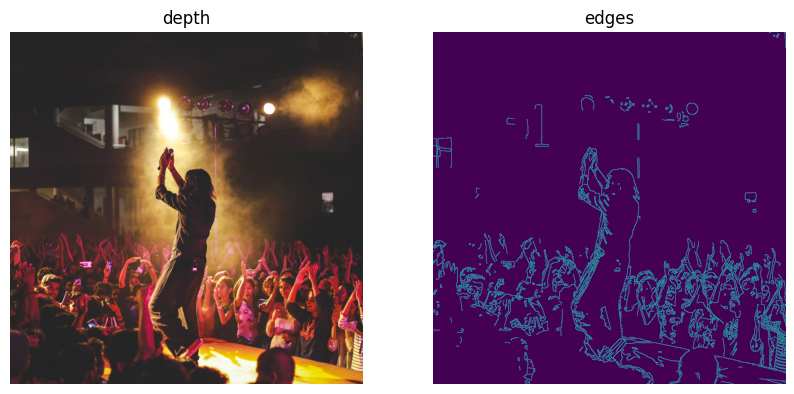

float64 0.0 1.0 (1024, 1024)
3053


In [67]:
plt.figure(figsize=(10, 10))


plt.subplot(121)
plt.title('depth')
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.title('edges')
plt.imshow(control)
plt.axis('off')
plt.show()

print(edges.dtype, np.min(edges), np.max(edges), edges.shape)

prompt = 'Award winning, detailed photo of two Santa Claus dancing and singing on stage, silhouettes of normal people in the background, highly detailed, handy-photo'
n_prompt = 'painting, drawing, long hands, bad quality, standard quality, low resolution, sitting, few details, bad hands, multiple Santa Claus' #closed eyes, dark,

seed = np.random.randint(4_000)
#seed = 2636
print(seed)

Global seed set to 3053


[CONTROL CORRECTION OF ControlledDiffusionEngine SCALED WITH 0.825]


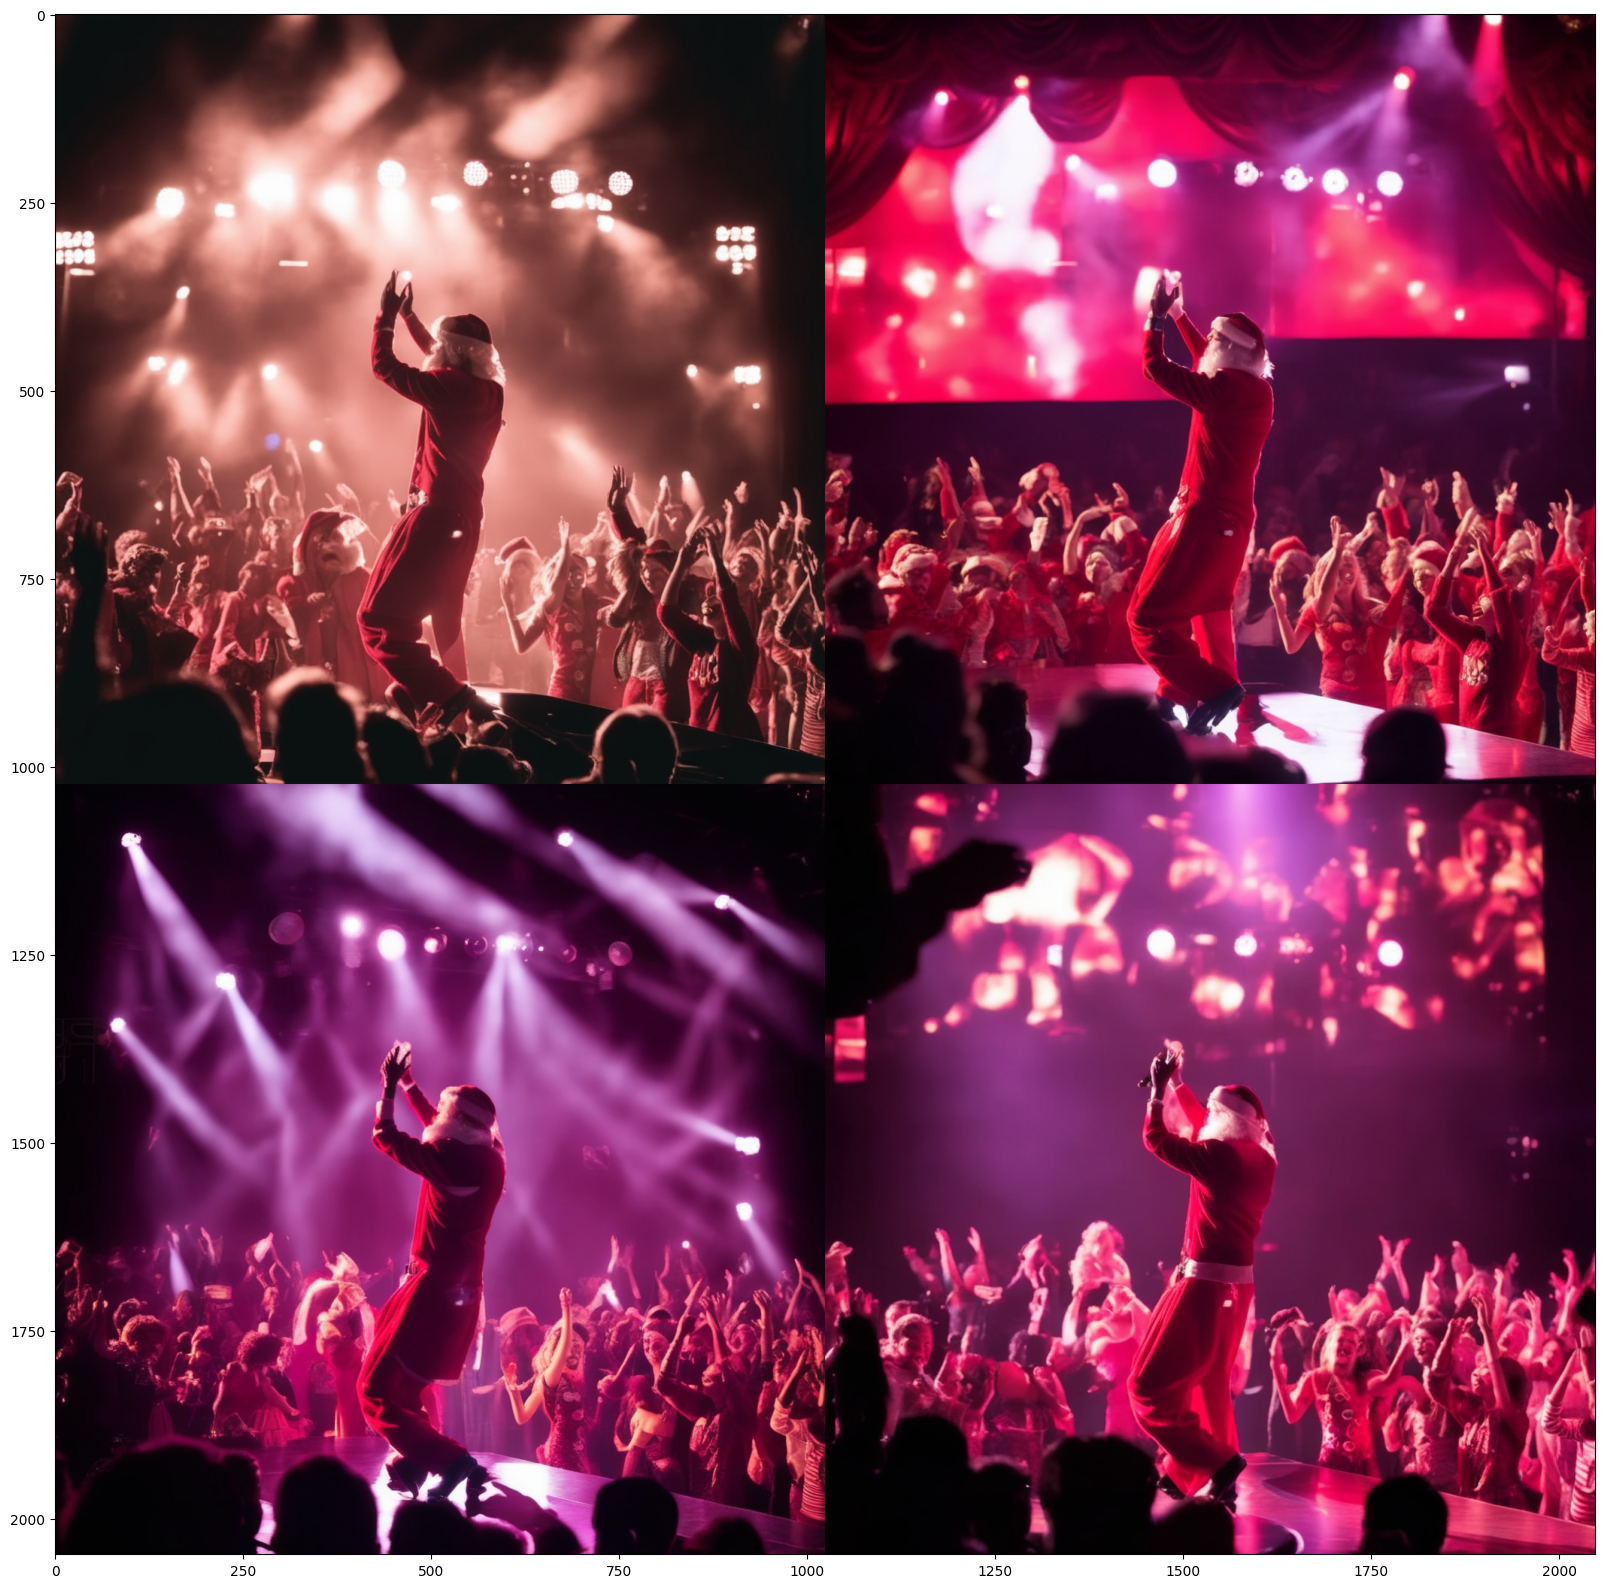

In [68]:

ds = [{
    'hint': control,
    'crop_coords_top_left': torch.tensor([0, 0]),
    'original_size_as_tuple': torch.tensor(edges.shape[-2:]),
    'target_size_as_tuple': torch.tensor(edges.shape[-2:]),
}]

samples, controls = cu.get_sdxl_sample(
                    guidance=control, #current['']# guidance=control,# ds = ds, #guidance=control, #current['']
                    ddim_steps=50,
                    num_samples=4,
                    model=model,
                    seed=seed,
                    shape=[4, size // 8, size // 8],
                    control_scale=0.925,
                    prompt=prompt, #current['Prompt'],
                    n_prompt=n_prompt,#'bad quality, normal quality, long hands,',
                    # control_sequence='linear',
                    # scale=5,
                )

plt.figure(figsize=(20, 20))
plt.imshow(cu.create_image_grid(samples))
plt.show()

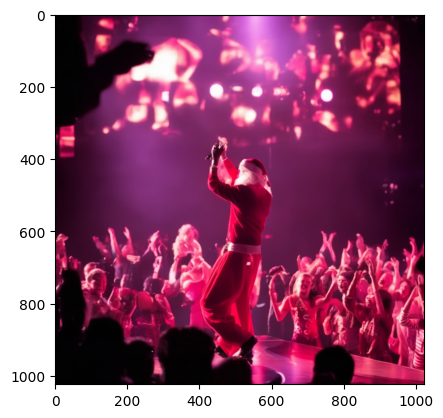

In [71]:

sampe_name =  prompt+ '_it'+str(it)+'_seed'+str(seed) # prompt 'dancing_santa_dallePrompt'
good = samples[3] #cu.create_image_grid(samples) # samples[1]


plt.imshow(good)
plt.show()

to_save = Image.fromarray(good)
if it == 0: 

    save = Image.fromarray( (control * 255).astype(np.uint8))
    if not save.mode == 'RGB':
        save = save.convert("RGB") 
    save.save('/export/data/ffeiden/ResultsControlNetXS/Chrismas/CNXS/'+sampe_name+'_control.png')
to_save.save('/export/data/ffeiden/ResultsControlNetXS/Chrismas/CNXS/'+sampe_name+'.png')
it +=1